##Project Case Scenario: Boston Housing

The following describes the dataset variables:
- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10000

- PT RATIO  pupil-teacher ratio by town. 
- LSTAT - % lower status of the population
- MEDV - the Median value of owner occupied homes in $1000s

In [63]:
# Defining imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)

##Task 4: Generate Descriptive Statistics and Visualizations

In [4]:
# Removing irrelevant column
boston_df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
# Checking basic statistics
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [6]:
# Setting Seaborn defaults
sns.set(style="whitegrid")

###For the "Median value of owner-occupied homes" provide a boxplot

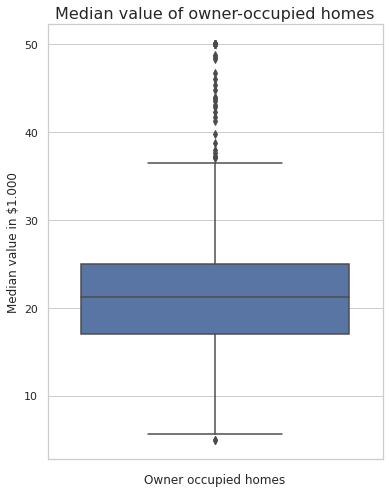

In [54]:
fig = plt.figure(figsize=(6,8))
ax = sns.boxplot(y='MEDV', data=boston_df)
plt.title('Median value of owner-occupied homes', size=16)
plt.ylabel('Median value in $1.000')
plt.xlabel('Owner occupied homes')
plt.show()

Our findings indicate the median value tends to fall between approx 17.000-25.000 dollars, although there is a significant variance between the median values of the owner-occupied homes.

###Provide a histogram for the Charles river variable

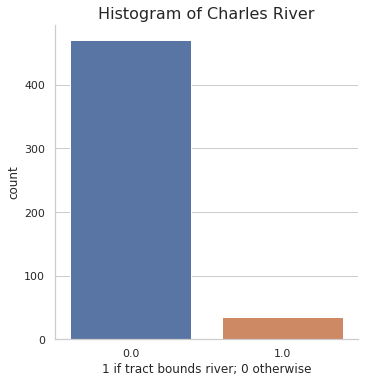

In [17]:
sns.catplot(x='CHAS', kind='count', data=boston_df)
plt.title('Histogram of Charles River', size=16)
plt.xlabel('1 if tract bounds river; 0 otherwise')
plt.show()

Our findings show what most of the observations are not adjacent to the Charles river, and only a very small part (approx 30) are adjacent.

###Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [86]:
# Step 1: Create AGE_GROUP category

# Note: The suggested group names are senseless since the AGE variable is a proportion
# Below we use sensible names instead
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = '35% and below'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'AGE_GROUP'] = '35% to 70%'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GROUP'] = '70% and above'

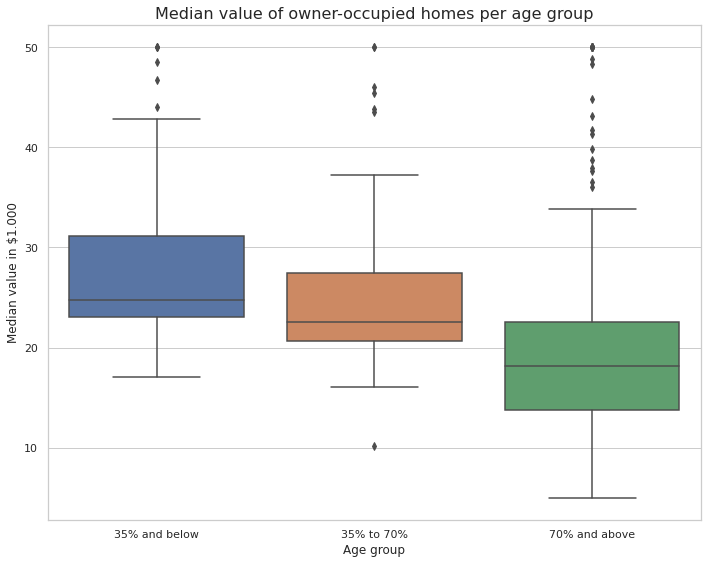

In [87]:
# Step 2: Plot
fig = plt.figure(figsize=(10,8))
ax = sns.boxplot(y='MEDV', x='AGE_GROUP', data=boston_df, 
                 order=['35% and below', '35% to 70%',
                        '70% and above'])
plt.title('Median value of owner-occupied homes per age group', size=16)
plt.ylabel('Median value in $1.000')
plt.xlabel('Age group')
plt.tight_layout()
plt.show()

We can see that the age of the homes have an effect on the median value; the homes with the least proportion built before 1940 have a higher median value than the rest, and the greater the proportion of houses build before 1940, the lower the median values.

###Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

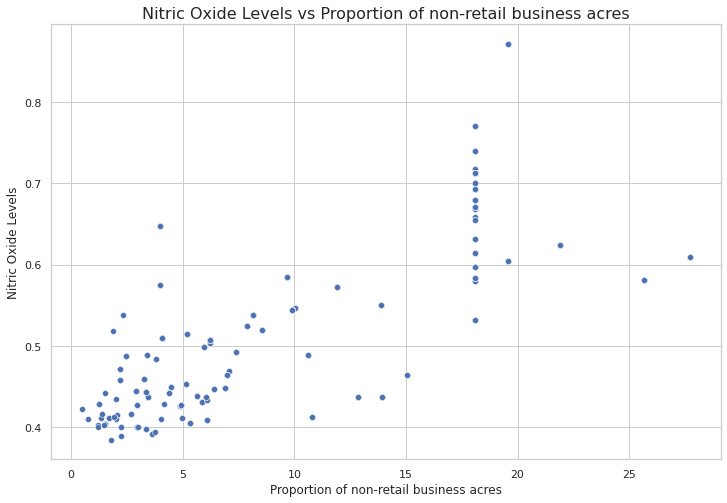

In [15]:
fig = plt.figure(figsize=(12,8))
ax = sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('Nitric Oxide Levels vs Proportion of non-retail business acres', size=16)
plt.xlabel('Proportion of non-retail business acres')
plt.ylabel('Nitric Oxide Levels')
plt.show()

Given the above, we can see a positively correlated relationship between the nitric oxide levels and the proportion of non-retail business acres.

###Create a histogram for the pupil to teacher ratio variable

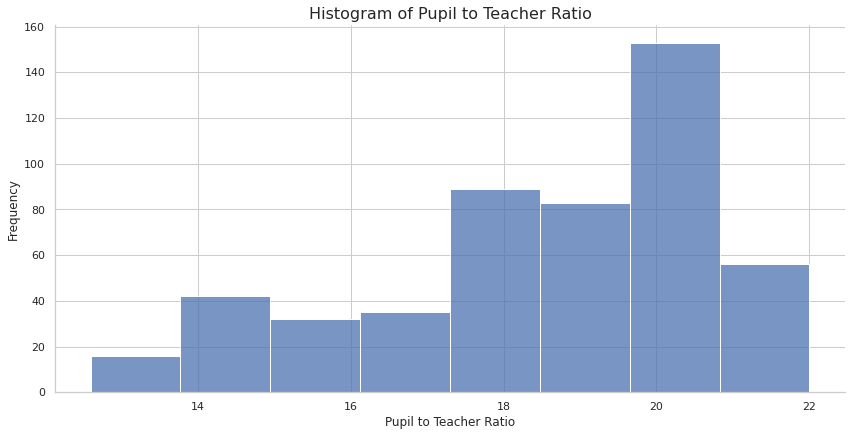

In [92]:
fig = sns.displot(boston_df['PTRATIO'], kde = False, height=6, aspect=2, bins=8)
plt.title('Histogram of Pupil to Teacher Ratio', size=16)
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

We can see the pupil to teacher ratio varies in frequency, but the distribution is right skewed with a greater frequency in the ratio of 20 students per teacher.

##Task 5: Use the appropriate tests to answer the questions provided

###Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)


**Hypothesis:**
- Null Hypothesis (H0): There is no significant difference in median value of houses bounded by the Charles River
- Alternative Hypothesis (H1): There is significant difference in median value of houses bounded by the Charles River

In [24]:
# Step 1: Apply Levene's test to check for homogeneity of variance
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   center='mean')

LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

From Levene's test, we observe the p-value is less than alpha of 0.05, which means we will not assume equality of variance in our below T-test.

In [29]:
# Step 2: Perform the T-test with equal_var = False
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                                boston_df[boston_df['CHAS'] == 1]['MEDV'],
                                equal_var = False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

**Conclusion:**
- We observe the p-value is less than the alpha of 0.05, and therefore reject the Null Hypothesis (H0)
- We conclude there is significant different in median value of houses bounded by the Charles River (H1)

###Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

**Hypothesis:**
- Null Hypothesis (H0): There is no significant difference in median value of the proportions of houses built prior to 1940
- Alternative Hypothesis (H1): There is significant difference in median value of at least one of the proportions of houses built prior to 1940

In [52]:
# Step 1: Create groups of the data we will compare

# Assigning the unique age group values to an ndarray
age_groups = boston_df['AGE_GROUP'].unique()
print('Groups:', age_groups)

# Get the MEDV data per group
group1 = boston_df[boston_df['AGE_GROUP'] == age_groups[0]]['MEDV']
group2 = boston_df[boston_df['AGE_GROUP'] == age_groups[1]]['MEDV']
group3 = boston_df[boston_df['AGE_GROUP'] == age_groups[2]]['MEDV']

# Step 2: Use Levene's test for equality of variance
scipy.stats.levene(group1, group2, group3, center='mean')

Groups: ['35% to 70%' '70% and above' 'Up to 35%']


LeveneResult(statistic=2.7806200293748438, pvalue=0.06295337343259205)

We observe the p-value of the Levene test is above 0.05 and conclude there is equality of variance between the groups.

In [50]:
# Step 3: Performing ANOVA 
f_statistic, p_value = scipy.stats.f_oneway(group1, group2, group3)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:**
- We observe the p-value is significantly less than the alpha of 0.05, and therefore reject the Null Hypothesis (H0)
- We conclude there is significant difference in median value of at least one of the proportions of houses built prior to 1940 (H1)

###Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

**Hypothesis:**
- Null Hypothesis (H0): Nitric oxide concentrations are not correlated with the proportion of non-retail business acres per town
- Alternative Hypothesis (H1): Nitric oxide concentrations are correlated with the proportion of non-retail business acres per town

In [53]:
# Both features are continuous; apply Pearson function
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209154, 7.913361061236894e-98)

**Conclusion:**
- We observe the p-value is significantly less than the alpha of 0.05, and therefore reject the Null Hypothesis (H0)
- We conclude there is a significant positive correlation (relationship) between the nitric oxide concentrations and the proportion of non-retail business acres per town (H1)

###What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

**Hypothesis:**
- Null Hypothesis (H0): There is no correlation (additional weighted distance) between the the Boston employment centres and the median value of owner-occupied homes
- Alternative Hypothesis (H1): There is correlation (additional weighted distance) between the Boston employment centres and the median value of owner-occupied homes

In [61]:
scipy.stats.pearsonr(boston_df['DIS'], boston_df['MEDV'])

(0.2499287340859039, 1.2066117273368017e-08)

In [62]:
0.062**0.5

0.24899799195977465

In [80]:
# Performing regression between MEDV and DIS

# X is the input variable (explanatory variable)
X = boston_df['DIS']

# y is the target/dependent variable
y = boston_df['MEDV']

# add an intercept (beta_0) to our model
X = sm.add_constant(X) 

# Fit the ordinary least squared model, incl prediction
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 17 Jan 2021   Prob (F-statistic):           1.21e-08
Time:                        07:21:05   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
print('Slope of the regression model is:', model.params[1])

Slope of the regression model is: 1.091613015841108


**Conclusion:**
- We observe the p-value is below the alpha of 0.05 and reject the Null Hypothesis
- We conclude there is a positive correlation between the weighted distance between the Boston employment centres and the median value of owner-occupied homes (H1)
- The impact of an additional weighted distance between the Boston employment centres and the median value of owner-occupied homes is estimated to be $ 1092 (since the median value is measured in 1000 dollars)